In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from sympy import Matrix
import tools.dataset_tools as dataset_tools
from tools.frame_pb2 import Frame
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tools.dataset_tools import read_frame, decode_img

In [6]:
class CameraDataProcessor:
    def __init__(self, frame_path):
        self.frame = read_frame(frame_path)
        self.camera = self.frame.cameras[0]
        self.img_array = decode_img(self.camera)
    
    def extract_detections(self):
        detections_dict = {}
        LABEL_COLOR_DICT = {
            0: (1.0, 0, 0),  # Car red
            1: (0, 1.0, 0),  # Truck green
            2: (0, 0, 1.0),  # Pedestrian blue
            3: (0, 0.5, 0.5) # Cyclist teal
        }

        for detection in self.camera.detections:
            x0, y0, width, height = detection.bbox
            x1 = x0 - width / 2
            y1 = y0 - height / 2
            label = detection.type
            color = LABEL_COLOR_DICT[label]

            detections_dict[detection.id] = {
                'bbox': (x0, y0, width, height),
                'corners': (x1, y1, width, height),
                'center': (x0, y0),
                'label': label,
                'color': color
            }
        return detections_dict

    def plot_detections(self, detections_dict):
        fig, ax = plt.subplots()
        ax.imshow(self.img_array)

        for det_id, det_info in detections_dict.items():
            x1, y1, width, height = det_info['corners']
            color = det_info['color']
            r = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor=color, facecolor='none')
            ax.add_patch(r)
            ax.scatter(*det_info['center'], color=color, s=3)
            ax.text(x1, y1, str(det_id), color=color, fontsize=12)

        plt.show()

def main():
    directory_path = os.path.join(os.getcwd(), "waymo/data_2/")
    frames_list = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith(".pb")]
    frames_list.sort()

    all_detections = {}

    for frame_path in frames_list:
        processor = CameraDataProcessor(frame_path)
        detections_dict = processor.extract_detections()
        all_detections[os.path.basename(frame_path)] = detections_dict
        # processor.plot_detections(detections_dict)

    print(all_detections) 
    return all_detections

all_detections = main()

{'frame_0.pb': {'1a7162c2-e63a-42b2-96dd-9f3ba7ee5568': {'bbox': (809.6983642578125, 720.0125732421875, 75.15921020507812, 89.68578338623047), 'corners': (772.1187591552734, 675.1696815490723, 75.15921020507812, 89.68578338623047), 'center': (809.6983642578125, 720.0125732421875), 'label': 0, 'color': (1.0, 0, 0)}, '1fa810d1-9956-4238-8ca5-41d8a0203cc9': {'bbox': (969.4906616210938, 681.485595703125, 22.105649948120117, 31.579500198364258), 'corners': (958.4378366470337, 665.6958456039429, 22.105649948120117, 31.579500198364258), 'center': (969.4906616210938, 681.485595703125), 'label': 0, 'color': (1.0, 0, 0)}, '3b6a8c8c-7940-453d-a22c-4c3bd9ed9c1c': {'bbox': (954.9640502929688, 671.3801879882812, 12.631799697875977, 13.263389587402344), 'corners': (948.6481504440308, 664.7484931945801, 12.631799697875977, 13.263389587402344), 'center': (954.9640502929688, 671.3801879882812), 'label': 0, 'color': (1.0, 0, 0)}, '4556db94-47bc-4f0d-b73b-a938aa20d89a': {'bbox': (500.2192687988281, 841.27

In [7]:
class KalmanFilter:
    def __init__(self):
        # State transition matrix
        self.F = np.array([[1, 0, 1, 0],  # x, vx
                           [0, 1, 0, 1],  # y, vy
                           [0, 0, 1, 0],
                           [0, 0, 0, 1]])
        # Measurement matrix
        self.H = np.array([[1, 0, 0, 0],
                           [0, 1, 0, 0]])
        # Initial state covariance
        self.P = np.eye(4) * 1000
        # Process noise covariance
        self.Q = np.eye(4)
        # Measurement noise covariance
        self.R = np.eye(2) * 10
        self.x = np.zeros((4, 1))  

    def predict(self):
        self.x = np.dot(self.F, self.x)
        self.P = np.dot(self.F, np.dot(self.P, self.F.T)) + self.Q

    def update(self, z):
        z = np.reshape(z, (2, 1))  
        y = z - np.dot(self.H, self.x)
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        K = np.dot(self.P, np.dot(self.H.T, np.linalg.inv(S)))
        self.x = self.x + np.dot(K, y)  
        self.P = self.P - np.dot(K, np.dot(self.H, self.P))
        
    def get_state(self):
        return self.x.flatten()

Processing frame_0.pb...
Processing frame_1.pb...
Processing frame_10.pb...
Processing frame_100.pb...
Processing frame_101.pb...
Processing frame_102.pb...
Processing frame_103.pb...
Processing frame_104.pb...
Processing frame_105.pb...
Processing frame_106.pb...
Processing frame_107.pb...
Processing frame_108.pb...
Processing frame_109.pb...
Processing frame_11.pb...
Processing frame_110.pb...
Processing frame_111.pb...
Processing frame_112.pb...
Processing frame_113.pb...
Processing frame_114.pb...
Processing frame_115.pb...
Processing frame_116.pb...
Processing frame_117.pb...
Processing frame_118.pb...
Processing frame_119.pb...
Processing frame_12.pb...
Processing frame_120.pb...
Processing frame_121.pb...
Processing frame_122.pb...
Processing frame_123.pb...
Processing frame_124.pb...
Processing frame_125.pb...
Processing frame_126.pb...
Processing frame_127.pb...
Processing frame_128.pb...
Processing frame_129.pb...
Processing frame_13.pb...
Processing frame_130.pb...
Processin

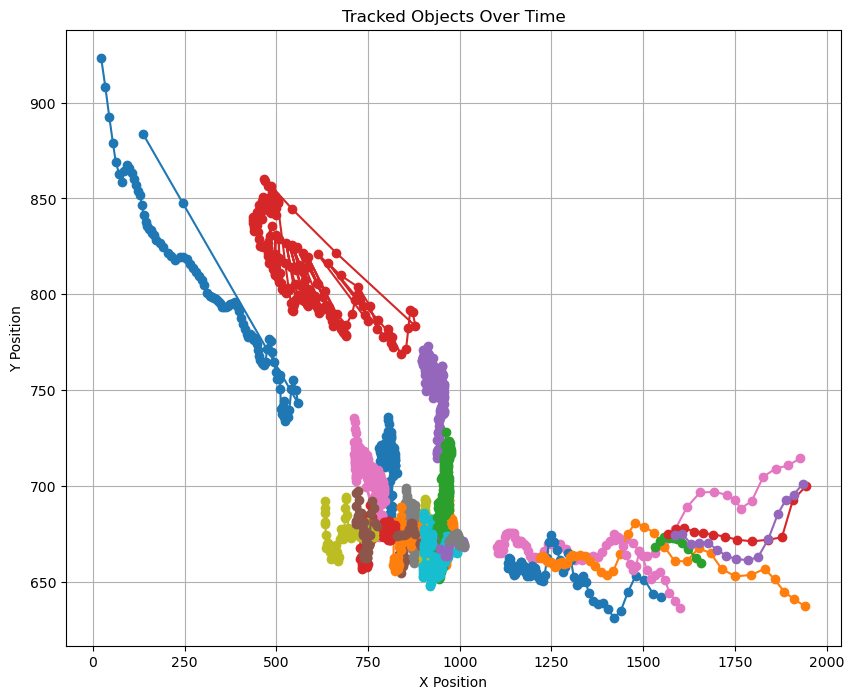

In [8]:
def process_detections(all_detections):
    # Dictionary to store Kalman Filters for each track
    track_filters = {}
    # Dictionary to store track states for plotting or analysis
    track_states = {}

    for frame, detections in sorted(all_detections.items()):
        print(f"Processing {frame}...")
        for det_id, det_info in detections.items():
            z = np.array([[det_info['center'][0]], [det_info['center'][1]]])

            if det_id not in track_filters:
                # Initialize new filter for new detection
                kf = KalmanFilter()
                kf.x[:2, 0] = z[:, 0] 
                track_filters[det_id] = kf
            else:
                kf = track_filters[det_id]

            kf.predict()

            kf.update(z)

            # Store the state
            track_states.setdefault(det_id, []).append(kf.get_state().flatten()) 

    for det_id, kf in track_filters.items():
        kf.predict()
        track_states[det_id].append(kf.get_state().flatten())

    return track_states
def plot_tracks(track_states):
    plt.figure(figsize=(10, 8))  
    for track_id, states in track_states.items():
        # Extract x and y positions from states
        x_positions = [state[0] for state in states]
        y_positions = [state[1] for state in states]

        plt.plot(x_positions, y_positions, marker='o', label=f'Track {track_id}')

    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Tracked Objects Over Time')
    # plt.legend()
    plt.grid(True)
    plt.show()
tracked_objects = process_detections(all_detections)
plot_tracks(tracked_objects)
